In [2]:
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader
from torchvision import transforms

In [6]:
fashion_mnist_train = FashionMNIST("FashionMNIST", train=True, download=True, transform=transforms.ToTensor())
fashion_mnist_test = FashionMNIST("FashionMNIST", train=False, download=True, transform=transforms.ToTensor())

In [7]:
batch_size = 128

train_loader = DataLoader(fashion_mnist_train, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(fashion_mnist_test, batch_size=batch_size, shuffle=True)

In [8]:
images, labels = iter(train_loader).next()

In [10]:
images.shape

torch.Size([128, 1, 28, 28])

tensor(6)


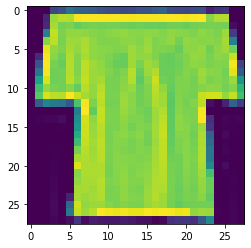

In [11]:
import matplotlib.pyplot as plt

print(labels[0])
plt.imshow(images[0].squeeze(0))

In [12]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [13]:
import torch.nn as nn

(height + 2*padding - filter_size)/stride + 1

(width + 2*padding - filter_size)/stride + 1

In [15]:
# fashion mnist のサイズが 28
(28 + 2*0 - 5)/1 + 1

24.0

In [16]:
(24 + 2*0 - 5)/1 + 1

20.0

In [17]:
(20 + 2*0 - 5)/1 + 1

16.0

In [18]:
16*16

256

In [19]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 16, 5, 1, 0),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 32, 5, 1, 0),
            nn.Conv2d(32, 64, 5, 1, 0),
            nn.MaxPool2d(2, 2)
        )
        self.dense = nn.Sequential(
            nn.Linear(256, 128),
            nn.Dropout(p=0.2),
            nn.Linear(128, 128),
            nn.Dropout(p=0.2),
            nn.Linear(128, 10)
        )
    
    def forward(self, x):
        out = self.conv_layers(x)
        out = out.view(out.size(0), -1) # Flatten data
        out = self.dense(out)
        return out

In [20]:
net = CNN()

In [24]:
print(images[0].shape)
print(images[0].unsqueeze(0).shape)

torch.Size([1, 28, 28])
torch.Size([1, 1, 28, 28])


In [25]:
net(images[0].unsqueeze(0))

tensor([[-0.1079, -0.0871,  0.0738, -0.0894, -0.0167, -0.0278, -0.0347,  0.0870,
          0.0627, -0.0262]], grad_fn=<AddmmBackward0>)

## Train and Evaluate Model

In [27]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
cuda = torch.device(device)

In [28]:
net = CNN().to(device)

In [29]:
images = images.to(device)
labels = labels.to(device)

In [32]:
import torch.nn as nn
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())
epochs = 20

train_loss_list = []
train_acc_list = []

val_loss_list = []
val_acc_list = []

import time
start = time.time()

for epoch in range(epochs):
    # Train
    net.train() # dropout がある時は少し挙動に気をつける？

    train_loss = 0
    train_acc = 0

    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss
        train_acc += (outputs.max(1)[1] == labels).sum().item()
    
    avg_train_loss = train_loss / len(train_loader.dataset)
    avg_train_acc = train_acc / len(train_loader.dataset)

    # Evaluation
    net.eval()
    val_loss = 0
    val_acc = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            val_acc += (outputs.max(1)[1] == labels).sum().item()
        avg_val_loss = val_loss / len(test_loader.dataset)
        avg_val_acc = val_acc / len(test_loader.dataset)
    
    train_loss_list.append(avg_train_loss)
    train_acc_list.append(avg_train_acc)

    val_loss_list.append(avg_val_loss)
    val_acc_list.append(avg_val_acc)

    end = time.time() - start
    print(f"Epoch{epoch+1}/{epochs}")
    print(f"TrainLoss:{avg_train_loss:.4f}, ValLoss:{avg_val_loss:.4f}")
    print(f"TrainAcc:{avg_train_acc:.4f}, ValAcc:{avg_val_acc:.4f}")
    print(f"{end} sec.")


Epoch1/20
TrainLoss:0.0026, ValLoss:0.0026
TrainAcc:0.8788, ValAcc:0.8793
6.012414455413818 sec.
Epoch2/20
TrainLoss:0.0024, ValLoss:0.0024
TrainAcc:0.8910, ValAcc:0.8906
12.009026050567627 sec.
Epoch3/20
TrainLoss:0.0022, ValLoss:0.0025
TrainAcc:0.9013, ValAcc:0.8844
18.006929397583008 sec.
Epoch4/20
TrainLoss:0.0020, ValLoss:0.0023
TrainAcc:0.9061, ValAcc:0.8943
24.03455901145935 sec.
Epoch5/20
TrainLoss:0.0019, ValLoss:0.0023
TrainAcc:0.9115, ValAcc:0.8947
30.21076488494873 sec.
Epoch6/20
TrainLoss:0.0018, ValLoss:0.0025
TrainAcc:0.9175, ValAcc:0.8874
36.243717670440674 sec.
Epoch7/20
TrainLoss:0.0017, ValLoss:0.0024
TrainAcc:0.9203, ValAcc:0.8944
42.401304721832275 sec.
Epoch8/20
TrainLoss:0.0016, ValLoss:0.0023
TrainAcc:0.9260, ValAcc:0.8985
48.43218183517456 sec.
Epoch9/20
TrainLoss:0.0015, ValLoss:0.0024
TrainAcc:0.9289, ValAcc:0.8973
54.50603723526001 sec.
Epoch10/20
TrainLoss:0.0014, ValLoss:0.0025
TrainAcc:0.9352, ValAcc:0.8925
60.541348934173584 sec.
Epoch11/20
TrainLoss:0.0

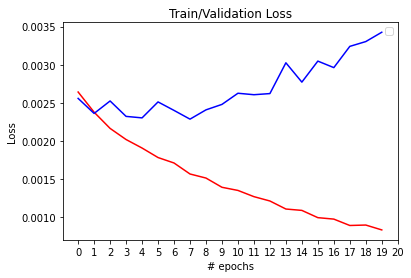

In [33]:
import matplotlib.pyplot as plt

plt.plot(train_loss_list, color='red')
plt.plot(val_loss_list, color='blue')
plt.xlabel('# epochs')
plt.ylabel('Loss')
plt.title('Train/Validation Loss')
plt.xticks(torch.arange(0, 21, 1))
plt.legend('')
plt.show()

## Inference

In [36]:
images, labels = iter(test_loader).next()

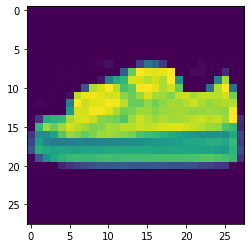

In [37]:
plt.imshow(images[0].view(28, 28))

In [39]:
classes[labels[0].item()]

'Sneaker'

In [40]:
images, labels = images.to(device), labels.to(device)

In [42]:
print(images[0].shape)
print(images[0].unsqueeze(0).shape)

torch.Size([1, 28, 28])
torch.Size([1, 1, 28, 28])


In [47]:
classes[net(images[0].unsqueeze(0)).max(dim=1)[1].item()]

'Sneaker'